<a href="https://colab.research.google.com/github/AREEBA-art552/car_price_prediction_project/blob/main/email_spam_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving email spam.zip to email spam (1).zip


In [ ]:
import zipfile

with zipfile.ZipFile("email spam.zip", 'r') as zip_ref:
    zip_ref.extractall("email_spam")

print("ZIP file extract ho gayi ✅")


ZIP file extract ho gayi ✅


In [9]:
import pandas as pd

# File ko read karo
df = pd.read_csv("email_spam/spam.csv", encoding='latin-1')

# Sirf zaroori columns rakho
df = df[['v1', 'v2']]
df.columns = ['label', 'message']

df.head()


,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby('label').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('message').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['message'].value_counts()
    for x_label, grp in _df_2.groupby('label')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('label')
_ = plt.ylabel('message')

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

# Labels ko numeric banao
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(df['message'], df['label'], test_size=0.2, random_state=42)

# Text vectorization
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


In [11]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

model = MultinomialNB()
model.fit(X_train_vec, y_train)

# Predict
y_pred = model.predict(X_test_vec)

# Result
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9838565022421525

Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       0.99      0.89      0.94       150

    accuracy                           0.98      1115
   macro avg       0.98      0.95      0.96      1115
weighted avg       0.98      0.98      0.98      1115



In [12]:
# Custom message test
sample = ["Congratulations! You've won a free ticket. Click here to claim."]
sample_vec = vectorizer.transform(sample)

print("Spam" if model.predict(sample_vec)[0] else "Not Spam")


Spam


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns


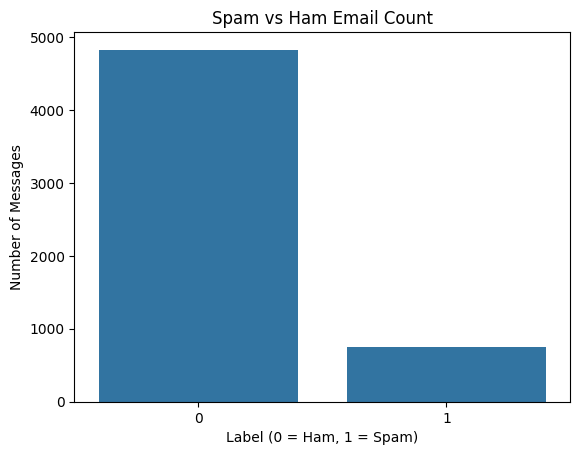

In [14]:
sns.countplot(x='label', data=df)
plt.title("Spam vs Ham Email Count")
plt.xlabel("Label (0 = Ham, 1 = Spam)")
plt.ylabel("Number of Messages")
plt.show()


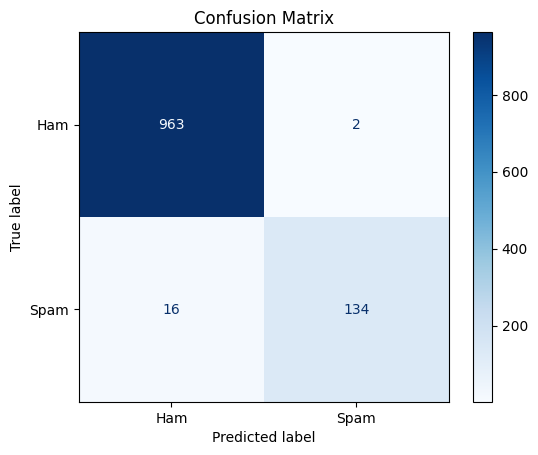

In [15]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Ham", "Spam"])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


In [16]:
!pip install wordcloud


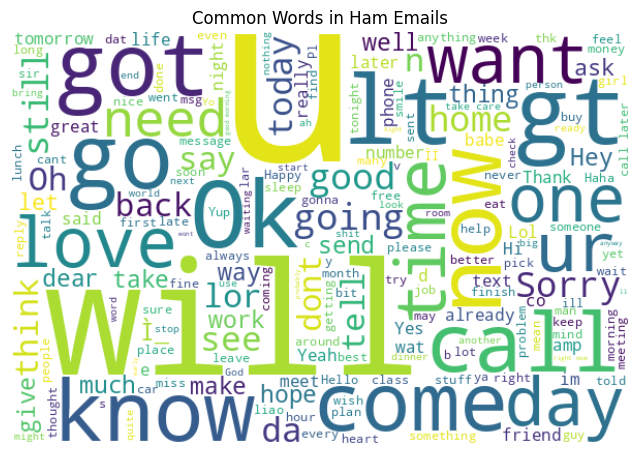

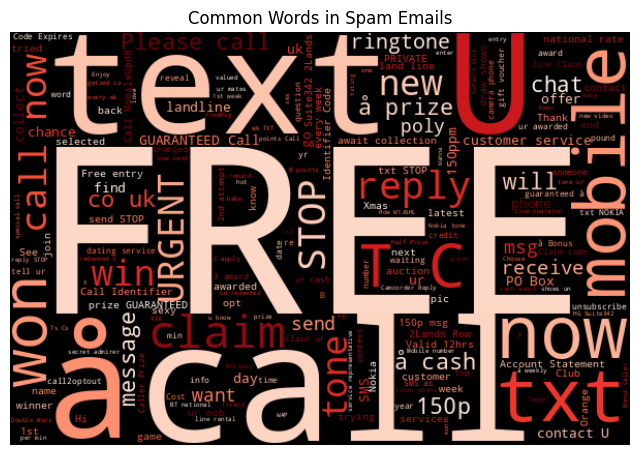

In [17]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Ham messages (non-spam)
ham_words = ' '.join(df[df['label'] == 0]['message'])

# Spam messages
spam_words = ' '.join(df[df['label'] == 1]['message'])

# Ham WordCloud
ham_cloud = WordCloud(width=600, height=400, background_color='white').generate(ham_words)
plt.figure(figsize=(8, 6))
plt.imshow(ham_cloud, interpolation='bilinear')
plt.axis('off')
plt.title("Common Words in Ham Emails")
plt.show()

# Spam WordCloud
spam_cloud = WordCloud(width=600, height=400, background_color='black', colormap='Reds').generate(spam_words)
plt.figure(figsize=(8, 6))
plt.imshow(spam_cloud, interpolation='bilinear')
plt.axis('off')
plt.title("Common Words in Spam Emails")
plt.show()
